In [1]:
%matplotlib notebook
import csv
import json
import time
import sys

import requests
import mwapi
import mwtypes
import pandas
import seaborn

In [2]:
session = mwapi.Session("https://en.wikipedia.org", user_agent="ahalfaker@wikimedia.org -- IWSC demo")

In [3]:
WEIGHTS = {'Stub': 1, 'Start': 2, 'C': 3, 'B': 4, 'GA': 5, 'FA': 6}
def score2sum(score_doc):
    weighted_sum = 0
    for cl, proba in score_doc['probability'].items():
        weighted_sum += WEIGHTS[cl] * proba
    return weighted_sum

In [4]:
def fetch_wp10_score(rev_id):
    response = requests.get('https://ores.wikimedia.org/v3/scores/enwiki/{0}/wp10'.format(rev_id))
    return response.json()['enwiki']['scores'][str(rev_id)]['wp10']['score']

def fetch_historical_scores(page_name):
    historical_scores = []
    for response_doc in session.get(action='query', prop='revisions', titles=page_name, 
                                    rvprop=['ids', 'timestamp'], rvlimit=100, rvdir="newer", 
                                    formatversion=2, continuation=True):
        for rev_doc in response_doc['query']['pages'][0]['revisions']:
            rev_id = rev_doc['revid']
            timestamp = rev_doc['timestamp']
            weighted_sum = score2sum(fetch_wp10_score(rev_id))
            historical_scores.append({'rev_id': rev_id, 'timestamp': timestamp, 'weighted_sum': weighted_sum})
            sys.stderr.write(".")
            sys.stderr.flush()
        sys.stderr.write("\n")
    
    return historical_scores


In [5]:
historical_scores = pandas.DataFrame(fetch_historical_scores("Ann Bishop (biologist)"))

....................................................................................................
................................................................................


In [21]:
historical_scores['time'] =pandas.to_datetime(historical_scores.timestamp, format='%Y-%m-%dT%H:%M:%SZ',errors='ignore')
historical_scores = historical_scores.set_index('time')

<IPython.core.display.Javascript object>


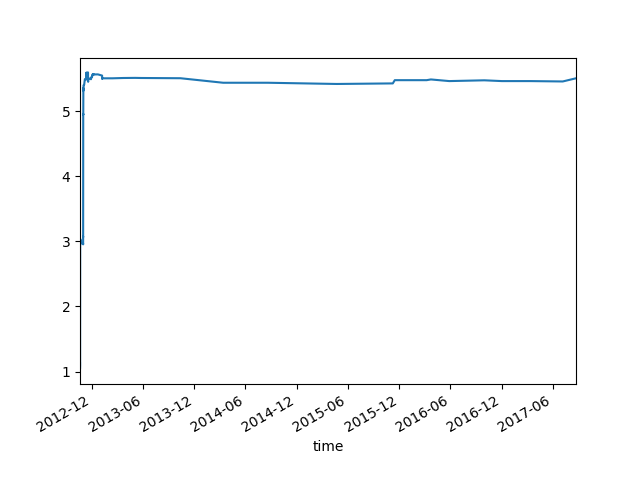

In [23]:
historical_scores['weighted_sum'].plot()

0     2012-10-19 17:11:05
1     2012-10-19 17:17:59
2     2012-10-19 17:32:56
3     2012-10-19 19:21:08
4     2012-10-20 01:49:57
5     2012-10-20 01:58:13
6     2012-10-20 07:19:47
7     2012-10-20 09:01:44
8     2012-10-20 20:05:44
9     2012-10-20 20:06:19
10    2012-10-21 14:39:51
11    2012-10-23 00:26:42
12    2012-10-24 11:23:48
13    2012-10-26 18:51:01
14    2012-10-26 18:59:36
15    2012-10-29 21:01:01
16    2012-10-29 21:02:20
17    2012-10-30 21:39:12
18    2012-10-30 21:39:57
19    2012-10-30 21:41:54
20    2012-10-30 21:48:36
21    2012-10-30 21:51:05
22    2012-10-30 21:52:36
23    2012-10-30 21:57:43
24    2012-10-30 21:59:32
25    2012-10-30 22:17:54
26    2012-10-30 22:41:19
27    2012-10-30 23:38:27
28    2012-10-30 23:39:57
29    2012-10-31 05:06:14
              ...        
150   2013-01-06 13:58:57
151   2013-01-06 14:00:06
152   2013-01-06 14:01:10
153   2013-01-06 14:02:05
154   2013-01-06 14:02:53
155   2013-01-07 23:49:15
156   2013-01-10 07:12:05
157   2013-0

In [18]:
historical_scores.index

RangeIndex(start=0, stop=180, step=1)